# **Instructions**

This document is a template, and you are not required to follow it exactly. However, the kinds of questions we ask here are the kinds of questions we want you to focus on. While you might have answered similar questions to these in your project presentations, we want you to go into a lot more detail in this write-up; you can refer to the Lab homeworks for ideas on how to present your data or results.

You don't have to answer every question in this template, but you should answer roughly this many questions. Your answers to such questions should be paragraph-length, not just a bullet point. You likely still have questions of your own -- that's okay! We want you to convey what you've learned, how you've learned it, and demonstrate that the content from the course has influenced how you've thought about this project.

# Project Name
Project mentor: Hao Ding

Travis You <zyou3@jh.edu>, Tammy Li <sli187@jh.edu>, Ling Qin <lqin8@jh.edu>

https://github.com/Siyu-Li-Tammy/ML_Project_CNN

# Outline and Deliverables

### Uncompleted Deliverables
1. "Would like to Complete #1": We decide to use only L1-norm in calculating the similarity matrix, instead of designing an image specific merging method, which will incorporate spacial cross-correlation computation.


### Completed Deliverables
1. "Must complete #1": We discuss training our models via individual fine-tuned image classification.
2. "Must complete #2": We discuss performance report detailing model performance metrics such as accuracy, precision and draw comparisons between merged model and individual fine-tuned models.
3. "Must complete #3": We present a complete set of code along with clear documentation about the usage and modification guidelines.
4. "Expect to Complete #1": We discuss comparisons between two different model merging methods: a simple approach that averages weights and a more complex approach that references the pretrained model. In the complex approach, we update the average weights only if the changes in the finetuned model and merged model align in the same direction; otherwise, we keep the pretrained model layer weights unchanged.
5. "Expect to Complete #2": We show validation of our model on extra datasets, such as PER2013, other than Cifar100. Different datasets can help valid the generalization capability of our merged model.
6. "Would like to Complete #2": We present detailed formulation with mathematical equations showing our merging calculation as well as algorithmic formulations for filter alignment, etc.


### Additional Deliverables
1. We decided to add data augmentation, including masking partial images to avoid potential overfitting, flipping images horizontally, random cropping and adding noise to increase model robustness.

# Preliminaries

**What problem were you trying to solve or understand?**

The primary motivation for our dedication to develop a way of merging well-trained deep neural network models is to enhance efficiency in applications where multiple tasks must be integrated into a single system. When deploying several trained models simultaneously, the combined computational load can be substantial, especially on devices with limited resources. Merging these models into a more compact, unified model can significantly reduce the storage requirements and inference time.

This merging is particularly advantageous in real-world scenarios where different models are needed to perform related tasks simultaneously. For example, a human-machine interaction system might require models for face recognition, gender classification, and facial expression analysis. By merging these models, the system can operate more efficiently, enabling quicker and potentially more accurate responses using fewer resources.

Another side benefit of our project is the potential to explore model representation changes after finetuning. By examining how merged model perform compared to pretrain and finetuned model, we can gain insights into how different features become more or less relevant in the merged model. Understanding these shifts can help us refine the process of merging itself, leading to more effective and efficient integrated models. Moreover, this knowledge can assist in identifying redundancies and complementarities among the features learned by different models, further optimizing the merging process.

**How is this problem similar to others we've seen in lectures, breakouts, and homeworks?**

The type of models to be merged are CNNs, which has been taught during class. In class, we also discussed transfer learning that allows us to leverage knowledge from one domain or task and apply it to another. The concept of merging models is similar in that it involves adapting different models, originally trained for separate tasks, to work together more efficiently. This adaptation often requires fine-tuning, similar to what we see in transfer learning scenarios.


**What makes this problem unique?**

What's unique here is our method which merges models incrementally, layer by layer. This is in contrast to traditional multitask learning methods that typically involve training a single network with multiple outputs from the ground up.

**What ethical implications does this problem have?**

Merging CNN models could lead to the development of more pervasive and powerful surveillance systems, potentially raising privacy concerns. The efficiency gains could also lead to the deployment of advanced AI in resource-limited regions, impacting society in various ways that need careful consideration.

## Dataset(s)

###Describe the dataset(s) you used. How many examples in each?

The first dataset is CIFAR-100 contains 60,000 colour images with a resolution of 32 x 32 pixels of 10 different classes with 6,000 images in each class. There are 50,000 training images, where 90 percentage are used as training as well as 10 percentage are used as validation, and 10,000 testing images.

The second dataset is FER2013 dataset is a dataset for facial expression recognition consisting of 35,887 grayscale images of size 48x48 pixels, categorised into seven emotions: anger, disgust, fear, happiness, sadness, surprise, and neutral.

###How were they collected?

CIFAR-100 is a popular benchmark dataset for image classification tasks available online. And FER2013 has been widely used in research for training and evaluating models for facial expression recognition tasks.

###Why did you choose them?

CIFAR-100 as a benchmark dataset is chosen as many available pre-trained models are based on CIFAR-100. Additional FER2013 dataset is chosen as an additional dataset to test the performance of our merged model. Since FER2013 is obviously different from CIFAR-100, it contains different feature information that we could test whether our model could successfully identity and capture.


***CIFAR100***

**Normalization:**
The images are converted to PyTorch tensors and normalized. Normalization is performed with specified mean (0.5070, 0.4865, 0.4409) and standard deviation (0.2673, 0.2564, 0.2761) across the RGB channels. This aligns the color channel values to a common scale and centers the data around zero, which can speed up training and lead to faster convergence.

**Augmentation Transform:**
Several augmentation techniques are applied to the training set:
RandomHorizontalFlip: This flips the images horizontally at random, which can help the model learn from different orientations.
RandomCrop(32, padding=4): Random crops of the image are taken, with padding added to the boundaries, which can make the model more robust to variations in
object placement within the image.
ColorJitter: Varying the brightness, contrast, saturation, and hue of the images to prevent the model from overfitting to specific color configurations.

**Transformed Subset:**
A custom TransformedSubset class is defined to apply the transformations when images are loaded. When an image is accessed from the dataset, the specified transform is applied on the fly before the image is returned. This means the images are augmented in real-time during training, which saves memory and introduces variability in the training process.
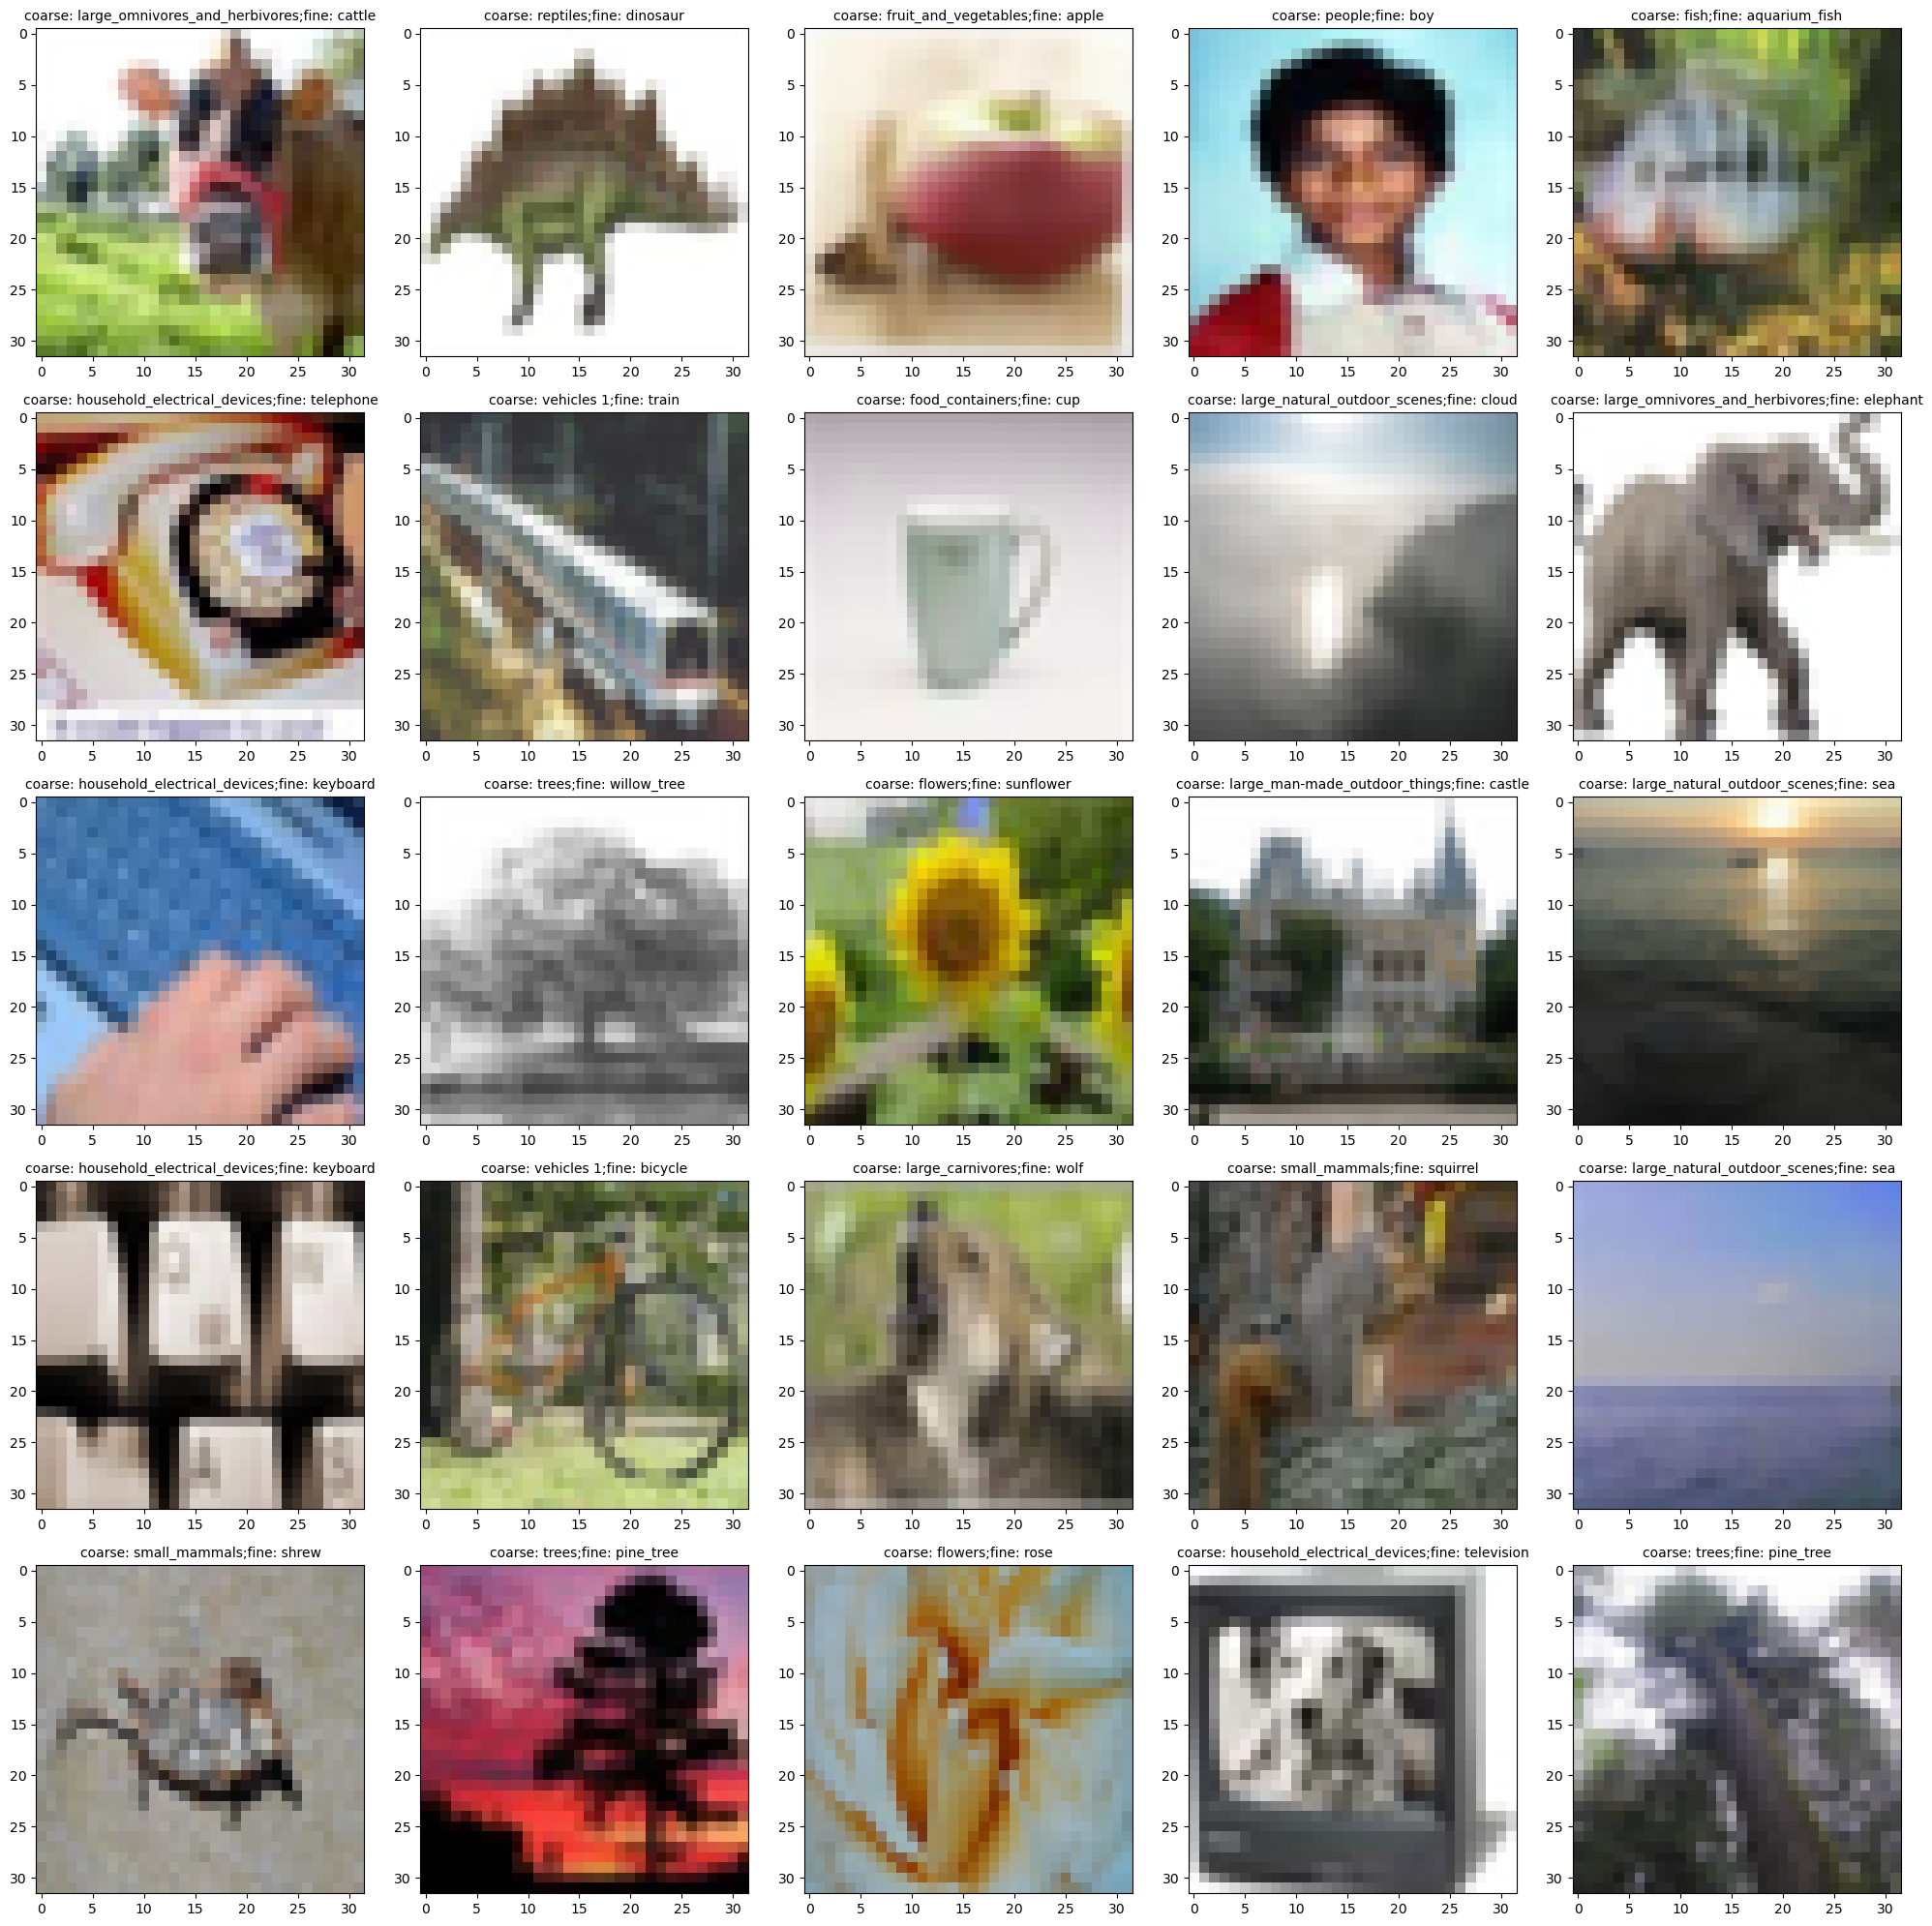
**Sparse to Coarse Labels:**
In addition to image preprocessing, the CIFAR100 labels are converted from fine labels to coarse labels. CIFAR100 has a hierarchy of labels, and this code snippet maps the fine-grained labels (100 classes) to their corresponding coarse-grained superclasses (20 classes).

***FER2013***

**Normalization**: We applied normalization techniques to all images using the pytorch function with a mean of 0.5
and standard deviation of 0.5, which should center the distribution around 0. As the FER2013 dataset is
in grayscale, we also expand its input dimension to 3 in order to fit the input dimension of resnet.

**Augmentation Transform**: Similar to the augmentation of CIFAR100 described above, we also applied the same set
of image augmentation tehcniques to ensure the train model is robust enough.

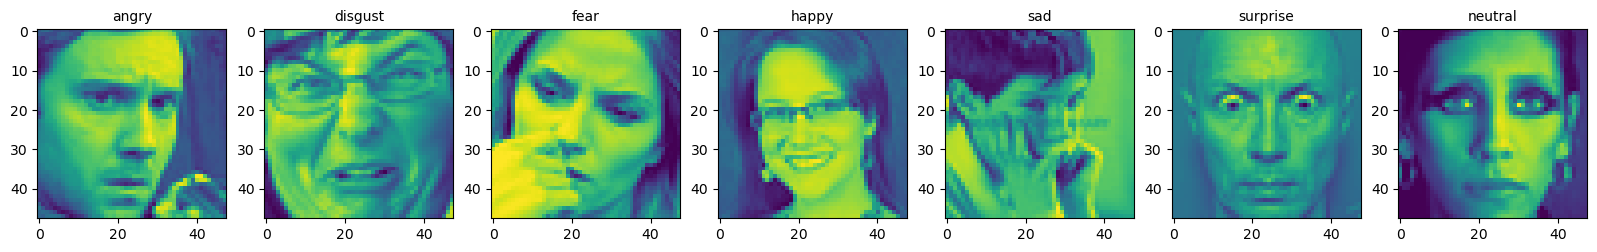

**Visualizing Data** see above



# Models and Evaluation

## Experimental Setup

How did you evaluate your methods? Why is that a reasonable evaluation metric for the task?

We adopt validation loss and validation accuracy metrics as evaluation metrics. The validation loss and validation accuracy are calculated during the model evaluation phase after each epoch. The goal is to minimize this loss and maximize the accuracy. These metrics are reasonable evaluation metrics for the task of training a classification model (such as for CIFAR-100) because they provide insights into how well the model is generalizing to unseen data.

What did you use for your loss function to train your models? Did you try multiple loss functions? Why or why not?

We use the CrossEntropyLoss function as the loss function to train the models, as it is commonly used for multi-class classification tasks like the one involving CIFAR-100. Since our project is a theoretical project instead of application project, we aim to focus on merging part and do not try different loss functions. Our merging method should be applicable to any loss functions based on different datasets and objectives.

How did you split your data into train and test sets? Why?

We adopt a 9:1 train-validation split ratio and 5:1 (train + validation)-test ratio. The train-validation ratio is because, with large enough data size (50,000), this gives enough training data to reduce bias and having enough validation data to estimate the model's performance accurately and control variance. The train-test ratio is provided as the dataset is already splitted into training set and testing set.


## Baselines

What baselines did you compare against? Why are these reasonable?

The baseline model that we compare against is merging by directly taking average of layers' weights. This is a reasonable baseline model because taking average is the simplest and most direct approach.

Did you look at related work to contextualize how others methods or baselines have performed on this dataset/task? If so, how did those methods do?

There are several other models with different merging approaches, but none of them is on the exactly same dataset that we adopted. One other model merging method is Fisher Merging, which merges several fine-tuned models using fisher information of fine-tuned model weights. It was shown that fisher merging achieves better performance than fusion and exhibits comparable performance to ensembling in some datasets. Another example is TIES-merging (abbreviation of trim, elect, sign & merge), which involves combining task vectors calculated from the difference between the original model and the fine-tuned models. The model trims the parameters, elects a sign vector for each parameter, and merges model parameters with the same sign as the elected sign vector. It achieves better performance than ensembling. However, to note, both models are studied primarily in the natural language processing field.


## Methods

What methods did you choose? Why did you choose them?

How did you train these methods, and how did you evaluate them? Why?

Which methods were easy/difficult to implement and train? Why?

For each method, what hyperparameters did you evaluate? How sensitive was your model's performance to different hyperparameter settings?

### Model Mergin Methods
Since our main task for this project is to design our own merging method, here is the detailed steps defined within our model_mergin class that implements three different merging method: Similarity Merge, Reference Merge, Average Merge.

**Initialization:**
The MergedModel class is initialized with two models (model1 and model2) that you wish to merge. Additionally, there is a reference to an model_original, which could be used for more advanced merging strategies (like weighted merges based on a reference model).

**Layer Extraction:**
The method get_first_n_conv2d_layers retrieves the first n convolutional layers from the specified model. This selective extraction allows focusing the merging process on the most impactful initial layers, which typically capture basic features in images.

**Similarity Calculation:**
The similarity calculation is only applied for the similarity merge. For each pair of corresponding layers from model1 and model2, the calculate_l1_distance_matrix method computes the L1 distance between the filters (kernels) of these layers. This matrix represents the similarity between all possible pairs of filters across the two layers, providing a basis for selecting which filters to merge.

**Filter Matching:**
The filter matching is also only implemented for the similarity merge. Using the Hungarian algorithm (linear_sum_assignment), the method get_most_similar_filters determines the optimal one-to-one matching between filters of the two layers based on the previously calculated L1 distance. This algorithm ensures that each filter from one layer is paired with the most similar filter from the other layer, minimizing overall distance.

**Filter Merging:**
For similarity merge, once filters are matched, merge_filters combines the selected filters by averaging their weights. This simple averaging is a form of ensemble learning at the filter level, potentially smoothing out noise and emphasizing common features captured by both models. For average merge, we do not perform any filter
matching or similiarty calculation. Instead, at the filter merging step, we just take the simple average of
the two filters. For reference merge, we calculate the elementwise difference between the layers of the model1 and the reference model (pretrained model) and that between the layers of model2 and the reference model. For each element, if their signs are the same, we take the average to be the final weight, if their signs are different, we take the weight from the pretrained model. This is inspired by TIEs merging in the NLP field.

**Layer Replacement:**
After filters in the first n layers are merged, the merge_layers function replaces the original layers in both partial_merge_model1 and partial_merge_model2 with these new merged layers. This step effectively combines the initial part of both models into a single unified architecture up to n layers.

### Model Training Methods
Due to the limited time, each merging method are evaluated in two settings.

The first setting is CIFAR100 fine label learning using pretrained model on CIFAR100 coarse labels. As described in the dataset section, CIFAR100 has 20 coarse labels and 100 fine labels. We pretrained a [Resnet-20 model](https://github.com/chenyaofo/pytorch-cifar-models.git) on the coarse labels for 200 epoches, with a batch-size of 256, an SGD of learning rate of 0.1, nesterov momentum of 0.9, weight_decay of 5e-4, as well as a CosineAnnealingLR scheduler that decays the learning rate to 0. With this pretrained model, we finetune the model to get two finetuned models each on 5 fine classes belong to the same coarse class (in our case, aquatic mammal v.s. fish). The models are finetuned for 20 epoches, trained with the same setting as the pretrained model on the aquatic mammal and fish subset. The training, validation, testing dataset manipulations are described in the previous sections.

The second setting is FER2013 and CIFAR100 coarse label learning using pretrain model on ImageNet datasets. We used the [Resnet-18 model from pytorch](https://pytorch.org/vision/main/models/generated/torchvision.models.resnet18.html) as our pretrained model. Then, we fine tune the pretrained model for FER2013 emotion detection and CIFAR100 coarse label image classification for 20 epochs, which uses the same hyperparameters as the previous setting. The FER2013 training, validation and testing dataset manipulations are described in the previous sections.

### Evaluation Method
To fully evaluate the effectiveness of different model mergin method, we merge all the conv2d layers in the model sequentially and evaluate the accuracy of the partially merged models on the finetune testing dataset. Along with accuracy, we also record the testing loss.
For the first setting, we sequentially merged 20 conv2d layers of Resnet20; for the second setting, we sequentially merged 18 conv2d layers of Resnet18.


## Results

For training the pretrained model in the first setting, the highest validation accuracy reaches 0.6814000010490417 with a training accuracy of 0.758222222328186 for 200 epoches, which suggests slight overfitting. We address these issues with the data augmentation method described above and employing early stopping. The finetuned model in the first setting also slightly overfits. For the fine-tuned model on classifying aquatic mammals, the training accuracy is 0.6827555894851685 while the validation accuracy is only 0.529411792755127. For the fine-tuned model on classifying fish, the training accuracy is 0.7711111307144165 and the validation accuracy is 0.7240000367164612. The testing accuracy for the two fine-tuned models are similar: 0.582 and 0.734, respectively. The training, validation, testing loss roughtly correlates with the accuracy.

In the second setting, the finetuned model on FER2013 reaches a training accuracy of 0.501915693283081, a validation accuracy of 0.4252873361110687, and a test accuracy of 0.41358885169029236 with 20 epoches, suggesting slight overfitting. The finetuned model on CIFAR100 coarse model reaches a training accuracy of 0.5365111231803894, a validation accuracy of 0.5428000092506409, and a testing accuracy of 0.538599967956543. The training, validation, testing loss roughtly correlates with the accruacy.



Result for setting 1 is shown in figure 1. We applied the three merging methods to sequentially merge the fish model and the aquatic mammal model. We find that:

1. Merging the initial conv2d layers (~8 layers) does not lead to significant performance deterioration for both models

2. Merging the deep layers makes the fish model performance to deteriorate signficantly, while the aquatic mammal models are more resistant to such layer merging

3. Similarity Merge and Average merge curve loss and accuracy almost completely overlap, suggesting finetuning the coarse label model on fine labels does not lead to signficiantly filter changes across shallow or deep layers which leads to different filter matching scheme

4. Reference Merge roughly follows the curve of similarity and average merge


Result for setting 2 is shown in figure 2. We applied the three merging methods to sequentailly merge the emotion detection model using FER2013 and the image classification model using coarse label of CIFAR100. Here are the highlights:

1. Compared to merging models finetuned on tasks using subset of pretrained dataset, merging models finetuned on out-of-distribution data leads to increased fluctuation in the merged model loss and accuracy with random performance dips

2. Generally, the loss increases and the accuracy decreases as more layers are merged

3. Emotion detection model is signficiantly more resistant to model merging than image classification model

4. Similarity merge performs the best on emotino detection model, but worst on image classification model

5. Loss and Accuracy pattern show intriguing inconsistencies: Referecne merge is able to keep the test loss low for emotion detection model across all layers, but its accuracy deteriorates after merging the first layer.


Our results show that the different merging methods perform differently on different tasks. There does not seem to a absolute best mergin method in our experiments. It seems that average merge, though simple, is a straighforward and sufficient merging method in many cases. Similarity merging outperforms the other mergin method if given appropriate dataset, Reference merge effectively minimize the loss increase as more layers are merged for two models trained on different dataset, but it does not guarantee that the accuracy deterioration is also kept low. It is surprising that the similarity merging method does not perform strictly better than average merge. Importantly, our results might allude to how model finetuning changes the weight. It seems to suggest that if finetuning on a task that has similar data distribution, deeper layers are altered to a higher degree, but if finetuning on a task that has very different data distribution, shallower layers are altered to a higher degree.


Figure 1.
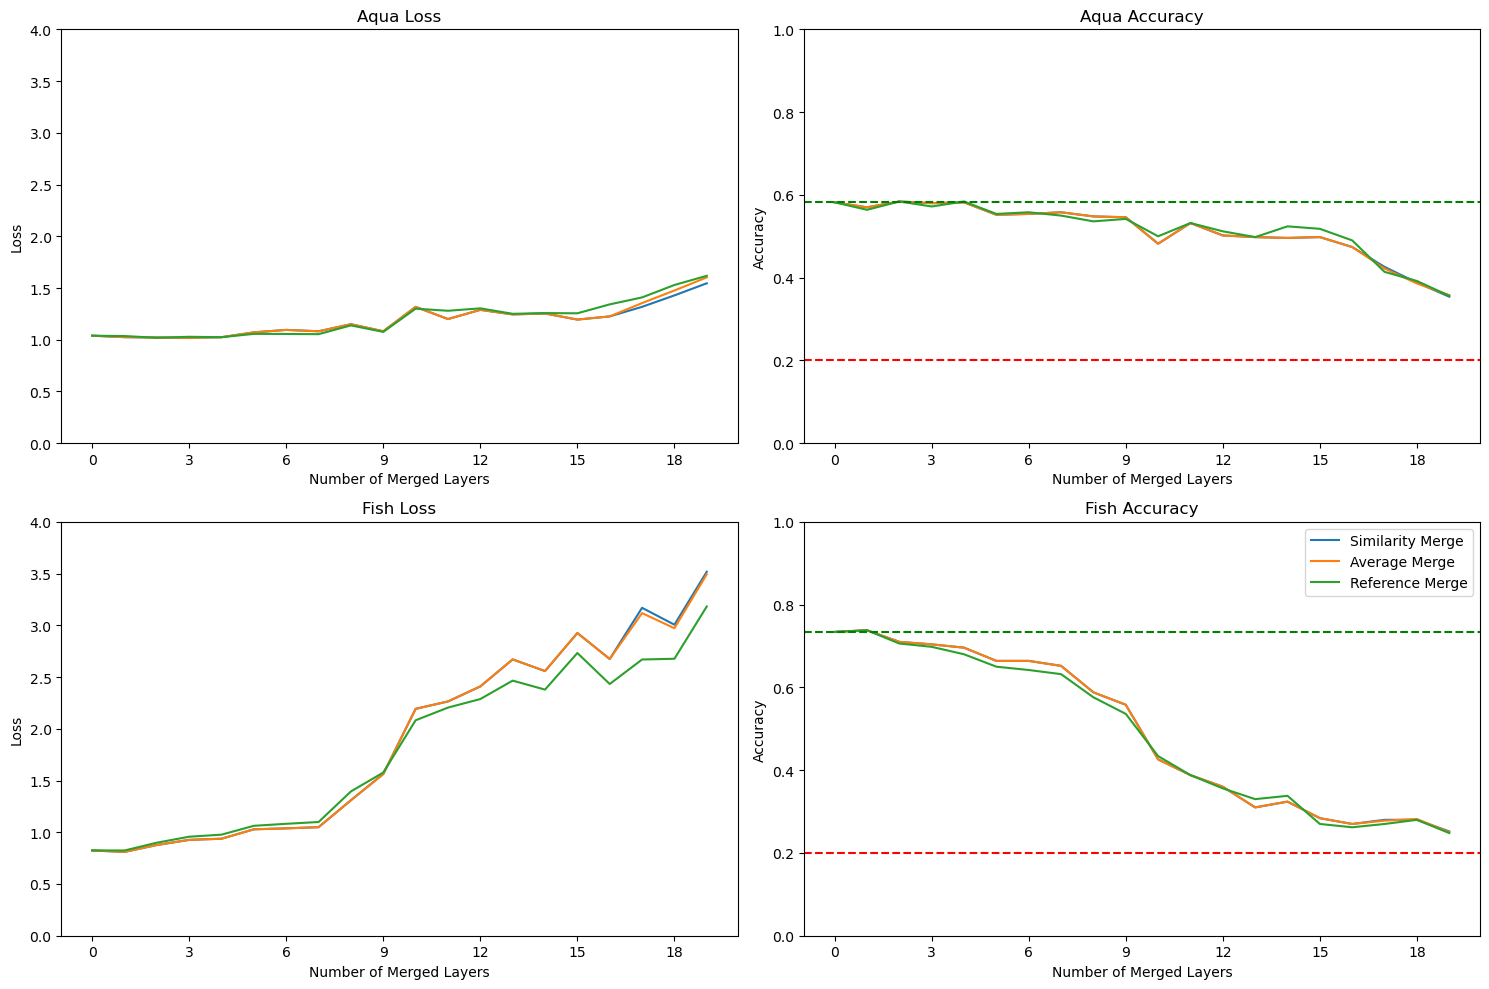

Figure 2.
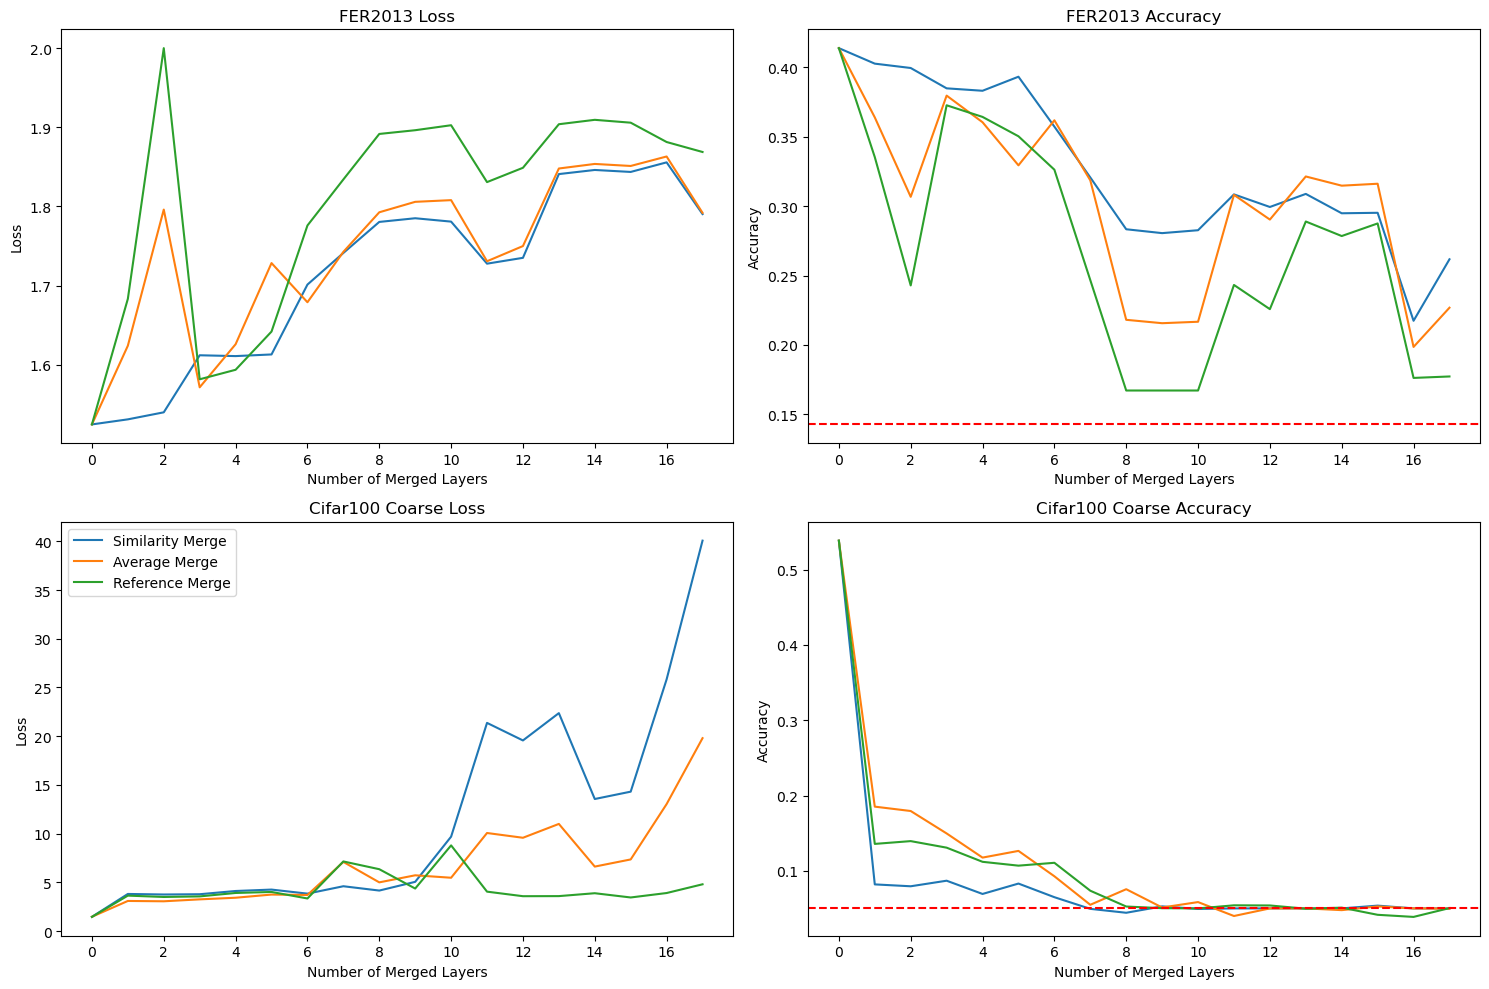

# Discussion

## What you've learned

*Note: you don't have to answer all of these, and you can answer other questions if you'd like. We just want you to demonstrate what you've learned from the project.*

###What concepts from lecture/breakout were most relevant to your project? How so?

Relevant concepts are understanding convolutional neural networks (CNNs), specifically how they are structured with layers such as Conv2D. Pretraining and finetune the model also utilized knowledge of normalization, regularization, data augmentation in order to ensure model robustness.

###What aspects of your project did you find most surprising?

One surprising aspect of is the complexity of aligning Conv2D filters from two different models. This process can involve intricate calculations and considerations to ensure that the merging is done correctly and that the resulting model performs well. We attempt to add L1-norm as well as cross-correlation matrixes to calculate similarity matrix, but cross-correlation computation for conv2d object is more complicated.

###If you had two more weeks to work on this project, what would you do next? Why?

If we had two more weeks to work on this project, we might consider further refining the alignment and merging process, adding cross-correlation factors to incorporate spacial information between layers, to improve the performance of the merged model. This could involve experimenting with different alignment strategies, conducting more extensive testing and validation, and possibly exploring additional techniques to enhance the integration of the two models. We would also try addition dataset to see how dataset difference contribute to mergin performance differences.